In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 14,
    "font.family": "serif",
})

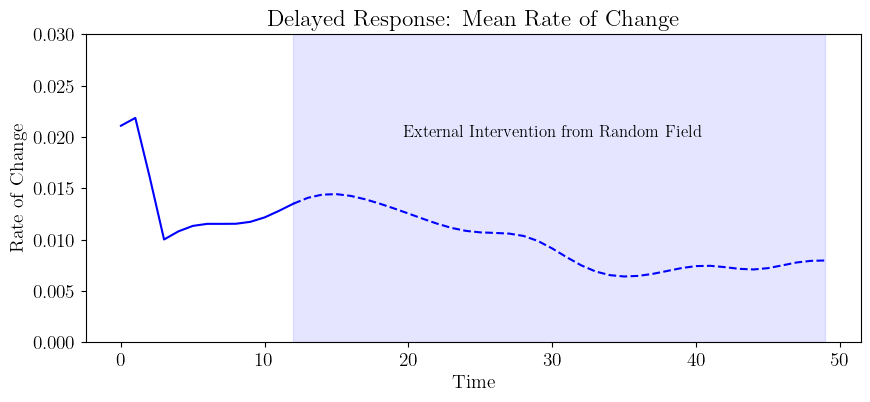

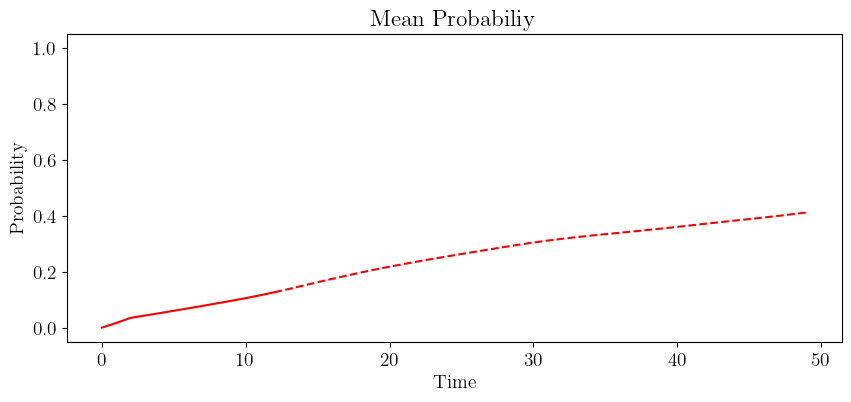

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


y_lower_limit, y_upper_limit = 0,0.03
def plot_rate_of_change(arr, color):
    df = pd.DataFrame({'val': arr})
    df['rateOfChange'] = arr
    plt.figure(figsize=(10, 4))
    plt.plot(df['rateOfChange'][:13], color=color)
    plt.plot(df['rateOfChange'][12:], linestyle="--", color=color)
    plt.fill_between(df.index, y_lower_limit, y_upper_limit, where=((df.index >= 12) & (df.index <= 49)), color='blue', alpha=0.1, interpolate=True)

    # Add text to the plot
    plt.text(30, 0.0200, 'External Intervention from Random Field', fontsize=12, ha='center')
    
    plt.xlabel("Time")
    plt.ylabel("Rate of Change")
    plt.ylim(0,0.03)
    plt.title("Delayed Response: Mean Rate of Change")

    # Additional customization or saving to file can be added here


    
def plot_mean(arr, color):
    df = pd.DataFrame({'val': arr})
    df['rateOfChange'] = np.gradient(arr)
    plt.figure(figsize=(10, 4))
    plt.plot(df['val'][:13], color=color)
    plt.plot(df['val'][12:], linestyle="--", color=color)
    plt.xlabel("Time")
    plt.ylabel("Probability")
    plt.ylim(-0.05, 1.05)
    plt.title("Mean Probabiliy")

    # Additional customization or saving to file can be added here

    plt.show()
# Example usage
# arr1 = np.load('crypt1/expo2_test2_mat2.npy')
# plot_rate_of_change(arr1, color="blue")

arr2 = np.gradient(np.load('crypt1/expo4_test2_mat2.npy'))
# plot_rate_of_change(arr2, color="blue")

# arr3 = np.load('crypt1/expo6_test2_mat2.npy')
# plot_rate_of_change(arr3, color="red")

arr4 = np.load('crypt1_c1_t1_roc_mean.npy')
plot_rate_of_change(arr2, color="blue")
# plot_rate_of_change(arr4, color="red")

plt.show()

arr4 = np.load('crypt1_c1_t1_mean.npy')
plot_mean(arr4, color="red")

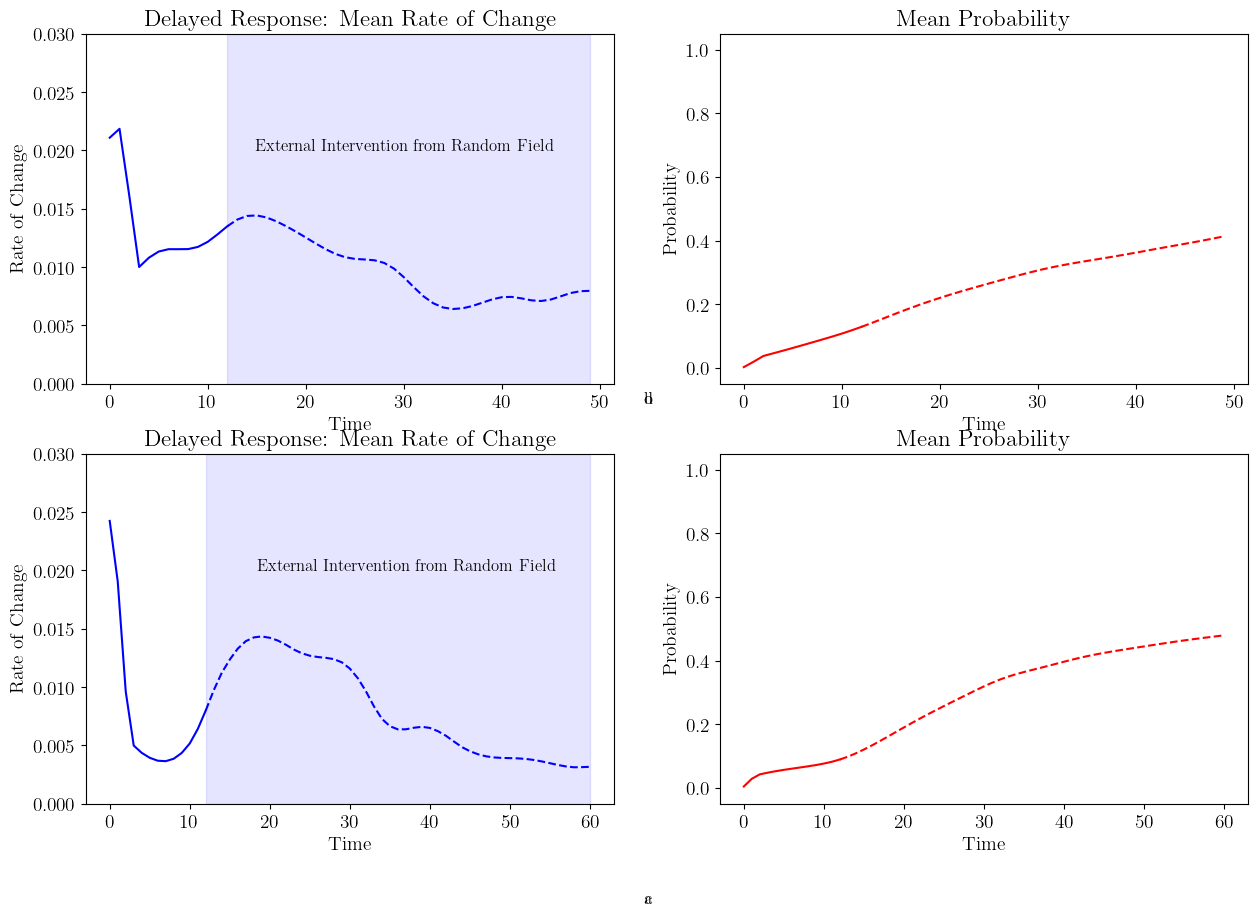

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

y_lower_limit, y_upper_limit = 0, 0.03

def plot_rate_of_change(ax, arr, color, lim=49, pos=(30, 0.0200), label=""):
    df = pd.DataFrame({'val': arr})
    df['rateOfChange'] = arr
    ax.plot(df['rateOfChange'][:13], color=color, label=label)
    ax.plot(df['rateOfChange'][12:], linestyle="--", color=color)
    ax.fill_between(df.index, y_lower_limit, y_upper_limit, where=((df.index >= 12) & (df.index <= lim)), color='blue', alpha=0.1, interpolate=True)
    ax.text(pos[0], pos[1], 'External Intervention from Random Field', fontsize=12, ha='center')
    ax.set_xlabel("Time")
    ax.set_ylabel("Rate of Change")
    ax.set_ylim(0, 0.03)
    ax.set_title("Delayed Response: Mean Rate of Change")

def plot_mean(ax, arr, color, label):
    df = pd.DataFrame({'val': arr})
    df['rateOfChange'] = np.gradient(arr)
    ax.plot(df['val'][:13], color=color, label=label)
    ax.plot(df['val'][12:], linestyle="--", color=color)
    ax.set_xlabel("Time")
    ax.set_ylabel("Probability")
    ax.set_ylim(-0.05, 1.05)
    ax.set_title("Mean Probability")

# Create a 4x4 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Load and plot data for the first subplot
arr2 = np.gradient(np.load('crypt1/expo4_test2_mat2.npy'))
plot_rate_of_change(axs[0, 0], arr2, color="blue", label='a')

# Load and plot data for the second subplot
arr4_1 = np.load('crypt1_c1_t1_mean.npy')
plot_mean(axs[0, 1], arr4_1, color="red", label='b')

# Load and plot data for the third subplot
arr4_2 = np.load('crypt2_c1_t1_roc_mean.npy')
plot_rate_of_change(axs[1, 0], arr4_2, color="blue", lim=60, pos=(37, 0.0200), label='c')

# Load and plot data for the fourth subplot
arr4_3 = np.load('crypt2_c1_t1_mean.npy')
plot_mean(axs[1, 1], arr4_3, color="red", label='d')
fig.text(0.23, 0.01, 'a', ha='center', fontsize=12)
fig.text(0.73, 0.01, 'b', ha='center', fontsize=12)
fig.text(0.23, 0.48, 'c', ha='center', fontsize=12)
fig.text(0.73, 0.48, 'd', ha='center', fontsize=12)
# Adjust layout
plt.tight_layout()

# Save the plot as "delayed_response.png"
plt.savefig("delayed_response.png")

# Display the plot
plt.show()